# 線性規劃

minimize:

c @ x
such that:

A_ub @ x <= b_ub    
A_eq @ x == b_eq  
lb <= x <= ub   

In [ ]:
import random  # 亂數
import math  # math 內置數學函數
import numpy as np  # 數字矩陣
import sympy as sp  # sympy 簡易別名 sp
import scipy 
from scipy import optimize as sci_opt
from sympy import I, pi, E
from sympy.parsing.sympy_parser import parse_expr  # 文字字串, 解釋成, Sympy 運算式
from sympy.plotting import plot  # 繪圖表
import json  # JSON 結構化資料
import datetime
from sympy.solvers.inequalities import solve_univariate_inequality
from sympy.solvers.inequalities import reduce_rational_inequalities
from sympy import lambdify
from matplotlib.figure import Figure
import re
import esutils as lib
import os
from sympy.geometry import Point, Circle, Triangle, Segment, Line, RegularPolygon
import matplotlib.pyplot as plt

def Get_PF602_Expr(QN,Tx=-1):
    tm=["""1. 設有甲、乙二紙廠生產三種紙類，
        甲廠機器每運轉一日可生產 1 噸 A 級紙、1 噸 B 級紙、5 噸 C 級紙；
        乙廠機器每運轉一日可生產 3 噸 A 級紙、1 噸 B 級紙、2 噸 C 級紙；
        今有 一訂單需 A 級紙 9 噸、B 級紙 7 噸、C 級紙 20 噸。 
        若甲廠運轉一日需花費 4 萬元，乙廠 需花費 3 萬元，
        問需如何運轉才能使開銷最低，又最低 的開銷為多少元？""",
        """2.有一工廠生產兩種不同產品(A,B),需4個部門,以下是各部門年最大產能:
        <table><tr><td><td>Product A <td>Product B
        <tr><td>Moulding<td>25000<td>35000
        <tr><td>Painting<td>33000<td>17000
        <tr><td>Assembly A<td>22500<td>0
        <tr><td>Assembly B<td>0<td>15000
        <tr><td>Net profit pre unit<td>300<td>250</table>
        """]
    x=sp.symbols('x')
    NTE=[]
    for i in range(0,QN):
        idx=i%2
        St=tm[idx].split("\n")
        Val=[0,0,0]
        TE=GetTE(i,St,Val)    
        TE["PlainText"]=1
        NTE.append(TE)    
    return NTE

## 一、農夫一塊農地，打算種植小麥或大麥
假設一個農夫有一塊$A$平方千米的農地，打算種植小麥或大麥，或是兩者依某一比例混合種植。
該農夫只可以使用有限數量的肥料$F$ 和農藥$P$，而單位面積的小麥和大麥都需要不同數量的肥料和農藥，小麥以
$( F_{1},P_{1} )$表示，大麥以$ (F_{2},P_{2})$表示。
設小麥和大麥的售出價格分別為 $ S_{1} $ 和 $ S_{2} $，
則小麥與大麥的種植面積問題可以表示為以下的線性規劃問題：  
$ \max Z=S_{1}x_{1}+S_{2}x_{2}$(最大化利潤 - 目標函數)   
$ s.t.$   
$ x_{1}+x_{2}\leq A$  	(種植面積的限制)  
$ F_{1}x_{1}+F_{2}x_{2}\leq F$	(肥料數量的限制)   
$ P_{1}x_{1}+P_{2}x_{2}\leq P$ 	(農藥數量的限制)  
$ x_{1}\geq 0,\,x_{2}\geq 0$ 	（不可以栽種負數的面積）   

## 二、有一工廠生產兩種不同產品(A,B),需4個部門,以下是各部門年最大產能:

|dept|Product A|Product B|
|---|---|---|
|Moulding|25000|35000|
|Painting|33000|17000|
|Assembly A|22500|0|
|Assembly B|0|15000|
|Net profit pre unit|300|250|

### 數學模型   
設:       
$x$ = produced units of Product_A;    
$y$ = produced units of Product_B;  
目標:     
max  $z=300x+250y$   
條件:$  \left\{\begin{array} \\ 1.4x+y ≤ 35000 \\ 0.51x+y ≤ 17000 \\ x ≤ 22500 \\ y ≤ 15000  \\  x ≥ 0 , y ≥ 0 \end{array}\right. $  


In [13]:
from scipy import optimize as op
import numpy as np
c=np.array([300,250])
A_ub=np.array([[1.4,1],[0.51,1],[1,0],[0,1]])
B_ub=np.array([35000,17000,22500,15000])
#A_eq=np.array([[1,1,1]])
#B_eq=np.array([7])
x1=(0,100000)
x2=(0,100000)
res=op.linprog(-c,A_ub,B_ub,bounds=(x1,x2))
print(res)

     con: array([], dtype=float64)
     fun: -7738750.673237922
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([6.04768232e-02, 2.93713250e-02, 2.27531585e+03, 8.31461829e+03])
  status: 0
 success: True
       x: array([20224.68415113,  6685.3817116 ])


```python
from pulp import * 
x = pulp.LpVariable("x", lowBound=0) 
y = pulp.LpVariable("y", lowBound=0) 
problem = pulp.LpProblem("A simple max problem", pulp.LpMaximize) problem += 300*x + 250*y, "The objective function" 
problem += 1.4*x + y <= 35000, "1st constraint"
problem += 0.51*x + y <= 17000, "2nd constraint"
problem += x <= 22500, "3rd constraint"
problem += y <= 15000, "4th constraint"
problem.solve()
print "Optimal Result:"
for variable in problem.variables():
    print variable.name, "=", variable.varValue
print "Total net max profit:"
print value(problem.objective)
Optimal Result:
x = 20224.719
y = 6685.3933
Total net max profit:
7738764.025
```

## 三. 用python做線性規劃

![](http://mail.mbc.edu.mo/ckeditorimages/worknote_210_2_linearprograming001.png)

比如要做這道題吧，需要用到scipy庫里面的函數
[scipy.optimize.linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)   


scipy.optimize. linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', callback=None, options=None )  
直接貼代碼吧  
```python
from scipy import optimize as op
import numpy as np
c=np.array([2,3,-5])
A_ub=np.array([[-2,5,-1],[1,3,1]])
B_ub=np.array([-10,12])
A_eq=np.array([[1,1,1]])
B_eq=np.array([7])
x1=(0,7)
x2=(0,7)
x3=(0,7)
res=op.linprog(-c,A_ub,B_ub,A_eq,B_eq,bounds=(x1,x2,x3))
print(res)
```
很容易發現，c指的應該是要求最大值的函數的係數陣列，A_ub是應該是不等式未知量的係數矩陣，仔細觀察的人應該發現，為什麼第一行裡面寫的是[-2，5，-1]而不是[2，5，-1]呢，應該要與圖裡對應才對啊，原來這不等式指的是<=的不等式，那如果是>=呢，乘個負號就行了。 A_eq就是其中等式的未知量係數矩陣了。 B_ub就是不等式的右邊了，B_eq就是等式右邊了。 bounds的話，指的就是每個未知量的範圍了。 我們看一下結果
```text
     fun: -14.571428571428571
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([3.85714286, 0.57142857, 6.42857143, 7.        , 0.        ])
  status: 0
 success: True
       x: array([6.42857143, 0.57142857, 0.        ])
```
重點關注的就是第一行和最後一行了，第一行是整個結果，最後一行是每個x的結果。 為什麼第一行是負的呢？ 原來這個函數其實是求最小值的，那麼求最大值，怎麼辦呢？ 很簡單，仔細觀察的人應該發現，之前的函數裡面，我寫的是-c，而不是c。 那麼這個函數的出來的結果其實就是-c的最小值，但很明顯這恰恰是c最大值的相反數。 那麼答案就是14.57了，以上。

原文链接：https://blog.csdn.net/your_answer/article/details/79131000


In [14]:
from scipy import optimize as op
import numpy as np
c=np.array([2,3,-5])
A_ub=np.array([[-2,5,-1],[1,3,1]])
B_ub=np.array([-10,12])
A_eq=np.array([[1,1,1]])
B_eq=np.array([7])
x1=(0,7)
x2=(0,7)
x3=(0,7)
res=op.linprog(-c,A_ub,B_ub,A_eq,B_eq,bounds=(x1,x2,x3))
print(res)

     con: array([1.19830172e-08])
     fun: -14.571428542312184
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-3.70231632e-08,  3.85714287e+00])
  status: 0
 success: True
       x: array([6.42857141e+00, 5.71428573e-01, 9.82192086e-10])


## 四、 計算題：
1. 設有甲、乙二紙廠生產三種紙類，   
 - 甲廠機器每運轉一日可生產 1 噸 A 級紙、1 噸 B 級紙、 5 噸 C 級紙；    
 - 而乙廠機器每運轉一日可生產 3 噸 A 級紙、1 噸 B 級紙、2 噸 C 級紙。  
 - 今有 一訂單需 A 級紙 9 噸、B 級紙 7 噸、C 級紙 20 噸。      
 - 若甲廠運轉一日需花費 4 萬元，乙廠 需花費 3 萬元，
 
 問需如何運轉才能使開銷最低，又最低 的開銷為多少元？ 
 
 ![](https://mail.mbc.edu.mo/ckeditorimages/worknote_210_2_linearprogramming001.png) 

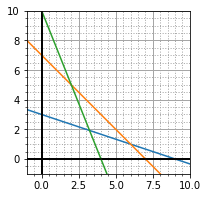

In [48]:
import sympy as sp
from sympy.geometry import Point, Circle, Triangle, Segment, Line, RegularPolygon
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

def PF602_PLOT(exprs,Path_):
    try:
        """
        fig=Figure()
        fig.set_figheight(3)
        fig.set_figwidth(3)
        ax=fig.subplots()    
        """        
        plt.close('all')
        fig = plt.figure()
        fig.set_figheight(3)
        fig.set_figwidth(3)            
        ax = fig.add_subplot(1, 1, 1)
        ax.set_aspect('equal')
        ax.grid(axis='both',which='major',color=[166/255,166/255,166/255], linestyle='-', linewidth=1)
        ax.minorticks_on()
        ax.grid(axis='both',which='minor',color=[166/255,166/255,166/255], linestyle=':', linewidth=1)
        for expr in exprs:
            lam_x = sp.lambdify(x, expr, modules=['numpy'])
            x_vals = np.linspace(-1, 10, 5)
            y_vals = lam_x(x_vals)
            ax.plot(x_vals, y_vals)
            ax.axhline(0, color='black')
            ax.axvline(0, color='black')            
        plt.xlim([-1,10])
        plt.ylim([-1,10])
        plt.show()        
        #fig.savefig(os.getcwd()+"\\static\\"+Path_)
    except:
        return None
    return Path_

 
def GetKey():
    return "3.1415926"

x,y=sp.symbols("x,y")
exprs=[(9-x)/3 ,7-x,(20-5*x) /2]
Qid=1
TE={}
TE["PlotImg"]=PF602_PLOT(exprs,"img"+GetKey()+str(Qid)+".png")

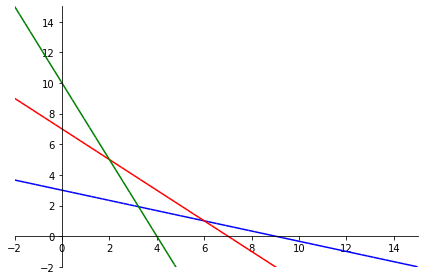

In [23]:
import numpy as np
import scipy as scp
import sympy as sp
from sympy.geometry import Point, Circle, Triangle, Segment, Line, RegularPolygon
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from IPython.display import Latex,HTML,Markdown                 #網頁顯示數學符號
from sympy.plotting import plot
from sympy import pi

x,y=sp.symbols("x,y")
f1=(9-x)/3 
f2=7-x
f3=(20-5*x) /2

#plot(expr1,(x, -5, 5)) 
p=sp.plot_parametric((x,f1),(x,f2),(x,f3), (x, -2,15 ), xlim =(-2,15),ylim =(-2,15),line_color='blue',show=False,adaptive=True)
p[1].line_color='red'
p[2].line_color='green'
p.show()


In [18]:
#Import package
from scipy import optimize
import numpy as np
#OK c,A_ub,B_ub
c = np.array([4,3])
A_ub = np.array([[-1,-3],[-1,-1],[-5,-2]])
B_ub = np.array([-9,-7,-20])
#Solve
res =optimize.linprog(c,A_ub,B_ub) #
print(res)

     con: array([], dtype=float64)
     fun: 22.999999759486787
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 7.99999990e+00, -6.44228439e-08, -2.70579726e-07])
  status: 0
 success: True
       x: array([1.99999995, 4.99999998])


In [28]:
from sympy.geometry import Point, Segment, Line,  Circle, Triangle, Curve
P1 = Point(0, 0); 
P2 = Point(3, 4); 
P3 =Point(2, -1); 
P4 = Point(-1, 5)
statement = Point.is_collinear(P1, P2, P3); 
print("Are P1, P2, P3 collinear?," ,statement)

Are P1, P2, P3 collinear?, False


# 資料收集

[matplot](https://www.math.ubc.ca/~pwalls/math-python/scipy/matplotlib/)

[integration](https://krajit.github.io/sympy/integration/integration.html)

[samlple1](https://medium.com/italiandirectory-publishing/linear-programming-with-python-and-pulp-2413f09a8872)

[video](https://www.youtube.com/watch?v=2dY_tRamSjY)

[linear-programming-python](https://realpython.com/linear-programming-python/)

[線性規劃](https://zh.wikipedia.org/zh-tw/%E7%BA%BF%E6%80%A7%E8%A7%84%E5%88%92)

在數學中，線性規劃（Linear Programming，簡稱LP）特指目標函數和約束條件皆為線性的最佳化問題。

線性規劃是最佳化問題中的一個重要領域。在作業研究中所面臨的許多實際問題都可以用線性規劃來處理，特別是某些特殊情況，例如：網路流、多商品流量等問題，都被認為非常重要。目前已有大量針對線性規劃演算法的研究。很多最佳化問題算法都可以分解為線性規劃子問題，然後逐一求解。在線性規劃的歷史發展過程中所衍伸出的諸多概念，建立了最佳化理論的核心思維，例如「對偶」、「分解」、「凸集」的重要性及其一般化等。在微觀經濟學和商業管理領域中，線性規劃亦被大量應用於例如降低生產過程的成本等手段，最終提升產值與營收。對線性規劃有早期貢獻的列昂尼德·維塔利耶維奇·康托羅維奇和特亞林·科普曼斯於1975年共同獲得諾貝爾經濟學獎。






[linearprograming](https://www.programmersought.com/article/20135139411/)

# Optimizing fast food orders using linear programming
[link](https://nathankjer.com/linear-programming-python/)

![](https://nathankjer.com/wp-content/uploads/2019/05/feasible-region.png)

https://www.programmersought.com/article/20135139411/

![](https://www.programmersought.com/images/908/befb6e685824921e4002a7a84640cc7c.png)

In [10]:
#Import package
from scipy import optimize
import numpy as np
 #OK c,A_ub,B_ub
c = np.array([50,100])
A_ub = np.array([[1,1],[2,1],[0,1]])
B_ub = np.array([300,400,250])
 #Solve
res =optimize.linprog(-c,A_ub,B_ub)
print(res)

     con: array([], dtype=float64)
     fun: -27499.99997406095
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([2.83033387e-07, 5.00000003e+01, 2.35747621e-07])
  status: 0
 success: True
       x: array([ 49.99999995, 249.99999976])


![](https://www.programmersought.com/images/60/fd13ba563979cf09f9c182ea7667e2a4.png)
![](https://www.programmersought.com/images/311/144bcb2e882b5faa1d5950b445162827.png)
![](https://www.programmersought.com/images/949/043e0542eb8f456ec73bd38d0495180d.png)
![](https://www.programmersought.com/images/845/04ccd4c244bbb6b6675a4b393e831a5d.png)
![](https://www.programmersought.com/images/205/62c04e68644418f08bccead14acbe9cd.png)
```
Iterating from one basic feasible solution to another basic feasible solution can be divided into two steps:
The first step is to select one of the original non-base variables (called the base variable) to make it a basic variable;
The second step is to select one of the original basic variables (called off-base variable) to make it a new non-base variable
3. Answer to this question
1) Through manual derivation, the optimal solution above is Z=27500
2), the optimal solution is
X1=50
X2=250
S1=50
s2=s3=0
The above is the final result. Next, Senior Lin Jun will lead you to solve the problem through two methods

3. Solve the optimal solution and maximum value of linear programming through the simplex method
1. Create a new txt file and fill in the linear regression analysis standardization model
```
![](https://www.programmersought.com/images/342/07ab7b350198a4da26687df05f69fede.png)
![]()
![]()


In [13]:
#Lagrange Solve the maximum and optimal solutions of linear programming
#Import the sympy package for derivation, equation solving, etc.
from sympy import * 
 #Set variables
x1 = symbols("x1")
x2 = symbols("x2")
alpha1 = symbols("alpha1")
alpha2 = symbols("alpha2")
alpha3 = symbols("alpha3")
#Construct Lagrangian equation
L = 50 *x1-100*x2 + alpha1 * (x1+ x2-300) +alpha2 *(2*x1 + x2-400)
#Seeking derivative, constructing KKT condition
difyL_x1 = diff(L, x1) #differentiate the variable x1
difyL_x2 = diff(L, x2) #differentiate the variable x2
difyL_alpha2 = diff(L, alpha2) #differentiation of multiplier alpha2
dualCpt =alpha1 * (x1+ x2-300)
 #Solve the KKT equation
aa = solve([difyL_x1, difyL_x2, dualCpt,difyL_alpha2], [x1, x2,alpha1,alpha2])
 #Print results, also need to verify kkt constraints
for i in aa:
    if i[2] >= 0 and i[0]>=0 and i[1]>=0:
        if (i[0]+i[1]-300) <= 0 and (2*i[0]+i[1]-400) <= 0 and (i[0]-250)<=0:
            print(i)


(100, 200, 250, -150)
